In [ ]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical

from cnn import load_model
from doa import convert_signals_to_covariance_input
from baselines import adversarial_train_and_save_doa, evaluate_cnn_across_epsilons

In [2]:
data = np.load('../data/processed/improved_doa_signals.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [3]:
# Convert signals to covariance input
X_train_cov = convert_signals_to_covariance_input(X_train, turn_on_time=750, block_size=750)
X_test_cov = convert_signals_to_covariance_input(X_test, turn_on_time=750, block_size=750)

# Convert labels to one-hot (DoA classification)
y_train_onehot = to_categorical(y_train, num_classes=61)
y_test_onehot = to_categorical(y_test, num_classes=61)

## Define Epsilon Values

In [4]:
epsilon_values_inf = np.linspace(0.0, 0.015, 20)
epsilon_values_l2 = np.linspace(0.0, 0.08, 20)

In [5]:
epsilon_linf = epsilon_values_inf[3]
print(f"Selected epsilon values: Linf = {epsilon_linf}")

Selected epsilon values: Linf = 0.0023684210526315787


In [6]:
epsilon_l2 = epsilon_values_l2[3]
print(f"Selected epsilon values: L2 = {epsilon_l2}")

Selected epsilon values: L2 = 0.01263157894736842


## Adversarial Training

### FGSM Linf Norm

In [7]:
model_fgsm_linf = adversarial_train_and_save_doa(
    X_train=X_train_cov,
    y_train=y_train_onehot,
    epsilon=epsilon_linf,
    norm='inf',
    attack_type='fgsm',
    save_path='../models/attack/cnn_doa_adv_fgsm_linf.h5',
    epochs=8
)

Model loaded from ../models/noattack/cnn_doa_cov.keras
Epoch 1/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8719 - loss: 0.3183 - val_accuracy: 0.9048 - val_loss: 0.1483 - learning_rate: 1.0000e-04
Epoch 2/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9054 - loss: 0.1603 - val_accuracy: 0.9346 - val_loss: 0.1298 - learning_rate: 1.0000e-04
Epoch 3/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9230 - loss: 0.1400 - val_accuracy: 0.9427 - val_loss: 0.1144 - learning_rate: 1.0000e-04
Epoch 4/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9375 - loss: 0.1251 - val_accuracy: 0.9569 - val_loss: 0.1018 - learning_rate: 1.0000e-04
Epoch 5/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9467 - loss: 0.1116 - val_accuracy: 0.9617 - val_loss: 0.0912 - learning_rate: 1.0000e-04
Epoch 6/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9512 - loss: 0.1035 - val_accuracy: 0.9644 - val_loss: 0.0825 - learning_rate: 1.0000e-04
Epoch 7/8

Model saved at ../models/attack/cnn_doa_adv_fgsm_linf.h5


In [8]:
test_loss, test_accuracy = model_fgsm_linf.evaluate(X_test_cov, y_test_onehot)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9598 - loss: 0.0520
CNN Test accuracy: 0.9606


In [7]:
model_adv_fgsm_linf = load_model(model_name='cnn_doa_adv_fgsm_linf', load_dir='../models/attack')

Model loaded from ../models/attack/cnn_doa_adv_fgsm_linf.h5


### FGSM L2 Norm

In [10]:
model_fgsm_l2 = adversarial_train_and_save_doa(
    X_train=X_train_cov,
    y_train=y_train_onehot,
    epsilon=epsilon_l2,
    norm='2',
    attack_type='pgd',
    save_path='../models/attack/cnn_doa_adv_fgsm_l2.h5',
    epochs=8
)

Model loaded from ../models/noattack/cnn_doa_cov.keras
Epoch 1/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8936 - loss: 0.2279 - val_accuracy: 0.9198 - val_loss: 0.1365 - learning_rate: 1.0000e-04
Epoch 2/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9173 - loss: 0.1427 - val_accuracy: 0.9333 - val_loss: 0.1252 - learning_rate: 1.0000e-04
Epoch 3/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9259 - loss: 0.1324 - val_accuracy: 0.9385 - val_loss: 0.1166 - learning_rate: 1.0000e-04
Epoch 4/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9323 - loss: 0.1262 - val_accuracy: 0.9452 - val_loss: 0.1093 - learning_rate: 1.0000e-04
Epoch 5/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9369 - loss: 0.1183 - val_accuracy: 0.9502 - val_loss: 0.1032 - learning_rate: 1.0000e-04
Epoch 6/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9392 - loss: 0.1158 - val_accuracy: 0.9533 - val_loss: 0.0970 - learning_rate: 1.0000e-04
Epoch 7/8

Model saved at ../models/attack/cnn_doa_adv_fgsm_l2.h5


In [11]:
test_loss, test_accuracy = model_fgsm_l2.evaluate(X_test_cov, y_test_onehot)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9667 - loss: 0.0510
CNN Test accuracy: 0.9648


In [8]:
model_adv_fgsm_l2 = load_model(model_name='cnn_doa_adv_fgsm_l2', load_dir='../models/attack')

Model loaded from ../models/attack/cnn_doa_adv_fgsm_l2.h5


### PGD Linf Norm

In [13]:
model_pgd_linf = adversarial_train_and_save_doa(
    X_train=X_train_cov,
    y_train=y_train_onehot,
    epsilon=epsilon_linf,
    norm='inf',
    attack_type='pgd',
    save_path='../models/attack/cnn_doa_adv_pgd_linf.h5',
    epochs=8
)

Model loaded from ../models/noattack/cnn_doa_cov.keras
Epoch 1/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8667 - loss: 0.3314 - val_accuracy: 0.9129 - val_loss: 0.1466 - learning_rate: 1.0000e-04
Epoch 2/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9026 - loss: 0.1621 - val_accuracy: 0.9329 - val_loss: 0.1273 - learning_rate: 1.0000e-04
Epoch 3/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9277 - loss: 0.1416 - val_accuracy: 0.9481 - val_loss: 0.1119 - learning_rate: 1.0000e-04
Epoch 4/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9397 - loss: 0.1261 - val_accuracy: 0.9533 - val_loss: 0.1006 - learning_rate: 1.0000e-04
Epoch 5/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9456 - loss: 0.1132 - val_accuracy: 0.9581 - val_loss: 0.0909 - learning_rate: 1.0000e-04
Epoch 6/8
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9503 - loss: 0.1010 - val_accuracy: 0.9644 - val_loss: 0.0793 - learning_rate: 1.0000e-04
Epoch 7/8

Model saved at ../models/attack/cnn_doa_adv_pgd_linf.h5


In [14]:
test_loss, test_accuracy = model_pgd_linf.evaluate(X_test_cov, y_test_onehot)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9710 - loss: 0.0507
CNN Test accuracy: 0.9691


In [9]:
model_adv_pgd_linf = load_model(model_name='cnn_doa_adv_pgd_linf', load_dir='../models/attack')

Model loaded from ../models/attack/cnn_doa_adv_pgd_linf.h5


### PGD L2 Norm

In [16]:
model_pgd_l2 = adversarial_train_and_save_doa(
    X_train=X_train_cov,
    y_train=y_train_onehot,
    epsilon=epsilon_l2,
    norm='2',
    attack_type='pgd',
    save_path='../models/attack/cnn_doa_adv_pgd_l2.h5',
    epochs=10
)

Model loaded from ../models/noattack/cnn_doa_cov.keras
Epoch 1/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8925 - loss: 0.2322 - val_accuracy: 0.9058 - val_loss: 0.1441 - learning_rate: 1.0000e-04
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9131 - loss: 0.1457 - val_accuracy: 0.9252 - val_loss: 0.1277 - learning_rate: 1.0000e-04
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9232 - loss: 0.1359 - val_accuracy: 0.9323 - val_loss: 0.1205 - learning_rate: 1.0000e-04
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9353 - loss: 0.1226 - val_accuracy: 0.9415 - val_loss: 0.1132 - learning_rate: 1.0000e-04
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9388 - loss: 0.1164 - val_accuracy: 0.9419 - val_loss: 0.1070 - learning_rate: 1.0000e-04
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9389 - loss: 0.1132 - val_accuracy: 0.9463 - val_loss: 0.1032 - learning_rate: 1.0000e-04
Epo

Model saved at ../models/attack/cnn_doa_adv_pgd_l2.h5


In [17]:
test_loss, test_accuracy = model_pgd_l2.evaluate(X_test_cov, y_test_onehot)
print(f'CNN Test accuracy: {test_accuracy:.4f}')

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9594 - loss: 0.0517
CNN Test accuracy: 0.9584


In [10]:
model_adv_pgd_l2 = load_model(model_name='cnn_doa_adv_pgd_l2', load_dir='../models/attack')

Model loaded from ../models/attack/cnn_doa_adv_pgd_l2.h5


## Evaluate and Compare Results

In [11]:
fgsm_inf = pd.read_csv('../results/improved_attacks/doa/fgsm_inf_accuracy.csv')
pgd_inf = pd.read_csv('../results/improved_attacks/doa/pgd_inf_accuracy.csv')
fgsm_l2 = pd.read_csv('../results/improved_attacks/doa/fgsm_l2_accuracy.csv')
pgd_l2 = pd.read_csv('../results/improved_attacks/doa/pgd_l2_accuracy.csv')

In [12]:
# adversarial training
acc_adv_fgsm_inf, preds_adv_fgsm_inf = evaluate_cnn_across_epsilons(
    model_adv_fgsm_linf, X_test_cov, y_test_onehot,
    epsilon_values_inf, attack_type='fgsm', norm='inf'
)

[FGSM-inf] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[FGSM-inf] Epsilon = 0.00079
Mean absolute perturbation at epsilon=0.00079: 0.000740
[FGSM-inf] Epsilon = 0.00158
Mean absolute perturbation at epsilon=0.00158: 0.001480
[FGSM-inf] Epsilon = 0.00237
Mean absolute perturbation at epsilon=0.00237: 0.002220
[FGSM-inf] Epsilon = 0.00316
Mean absolute perturbation at epsilon=0.00316: 0.002961
[FGSM-inf] Epsilon = 0.00395
Mean absolute perturbation at epsilon=0.00395: 0.003701
[FGSM-inf] Epsilon = 0.00474
Mean absolute perturbation at epsilon=0.00474: 0.004441
[FGSM-inf] Epsilon = 0.00553
Mean absolute perturbation at epsilon=0.00553: 0.005181
[FGSM-inf] Epsilon = 0.00632
Mean absolute perturbation at epsilon=0.00632: 0.005921
[FGSM-inf] Epsilon = 0.00711
Mean absolute perturbation at epsilon=0.00711: 0.006661
[FGSM-inf] Epsilon = 0.00789
Mean absolute perturbation at epsilon=0.00789: 0.007401
[FGSM-inf] Epsilon = 0.00868
Mean absolute perturbation at epsilo

In [13]:
fgsm_inf['adv_trained'] = acc_adv_fgsm_inf

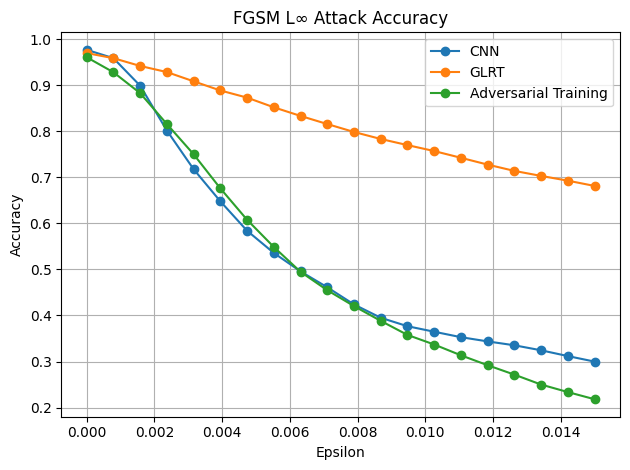

In [14]:
fgsm_inf.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "adv_trained"],
    marker='o'
)

plt.title("FGSM L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "Adversarial Training"])
plt.tight_layout()
plt.show()

In [17]:
fgsm_inf.to_csv('../results/baseline/doa/fgsm_inf_accuracy_with_adv.csv', index=False)

In [18]:
# adversarial training
acc_adv_fgsm_l2, preds_adv_fgsm_l2 = evaluate_cnn_across_epsilons(
    model_adv_fgsm_l2, X_test_cov, y_test_onehot,
    epsilon_values_l2, attack_type='fgsm', norm='2'
)

[FGSM-2] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[FGSM-2] Epsilon = 0.00421
Mean absolute perturbation at epsilon=0.00421: 0.000101
[FGSM-2] Epsilon = 0.00842
Mean absolute perturbation at epsilon=0.00842: 0.000202
[FGSM-2] Epsilon = 0.01263
Mean absolute perturbation at epsilon=0.01263: 0.000304
[FGSM-2] Epsilon = 0.01684
Mean absolute perturbation at epsilon=0.01684: 0.000405
[FGSM-2] Epsilon = 0.02105
Mean absolute perturbation at epsilon=0.02105: 0.000506
[FGSM-2] Epsilon = 0.02526
Mean absolute perturbation at epsilon=0.02526: 0.000607
[FGSM-2] Epsilon = 0.02947
Mean absolute perturbation at epsilon=0.02947: 0.000708
[FGSM-2] Epsilon = 0.03368
Mean absolute perturbation at epsilon=0.03368: 0.000809
[FGSM-2] Epsilon = 0.03789
Mean absolute perturbation at epsilon=0.03789: 0.000911
[FGSM-2] Epsilon = 0.04211
Mean absolute perturbation at epsilon=0.04211: 0.001012
[FGSM-2] Epsilon = 0.04632
Mean absolute perturbation at epsilon=0.04632: 0.001113
[FGS

In [19]:
fgsm_l2['adv_trained'] = acc_adv_fgsm_l2

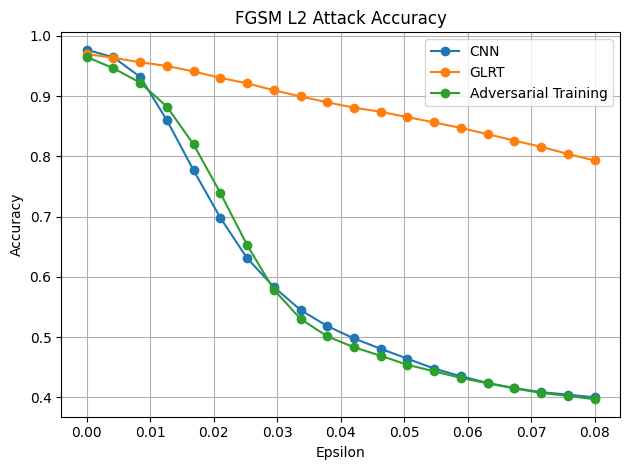

In [20]:
fgsm_l2.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "adv_trained"],
    marker='o'
)

plt.title("FGSM L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "Adversarial Training"])
plt.tight_layout()
plt.show()

In [21]:
fgsm_l2.to_csv('../results/baseline/doa/fgsm_l2_accuracy_with_adv.csv', index=False)

In [22]:
# distillation
acc_adv_pgd_inf, preds_adv_pgd_inf = evaluate_cnn_across_epsilons(
    model_adv_pgd_linf, X_test_cov, y_test_onehot,
    epsilon_values_inf, attack_type='pgd', norm='inf'
)

[PGD-inf] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[PGD-inf] Epsilon = 0.00079
Mean absolute perturbation at epsilon=0.00079: 0.000680
[PGD-inf] Epsilon = 0.00158
Mean absolute perturbation at epsilon=0.00158: 0.001289
[PGD-inf] Epsilon = 0.00237
Mean absolute perturbation at epsilon=0.00237: 0.001850
[PGD-inf] Epsilon = 0.00316
Mean absolute perturbation at epsilon=0.00316: 0.002370
[PGD-inf] Epsilon = 0.00395
Mean absolute perturbation at epsilon=0.00395: 0.002860
[PGD-inf] Epsilon = 0.00474
Mean absolute perturbation at epsilon=0.00474: 0.003326
[PGD-inf] Epsilon = 0.00553
Mean absolute perturbation at epsilon=0.00553: 0.003771
[PGD-inf] Epsilon = 0.00632
Mean absolute perturbation at epsilon=0.00632: 0.004202
[PGD-inf] Epsilon = 0.00711
Mean absolute perturbation at epsilon=0.00711: 0.004620
[PGD-inf] Epsilon = 0.00789
Mean absolute perturbation at epsilon=0.00789: 0.005025
[PGD-inf] Epsilon = 0.00868
Mean absolute perturbation at epsilon=0.00868: 0

In [23]:
pgd_inf['adv_trained'] = acc_adv_pgd_inf

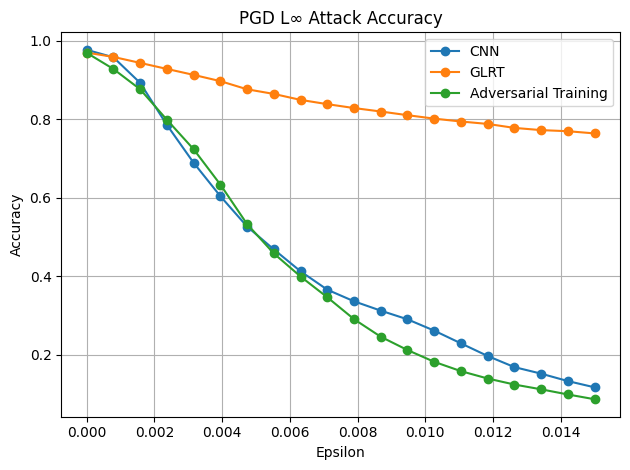

In [24]:
pgd_inf.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "adv_trained"],
    marker='o'
)

plt.title("PGD L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "Adversarial Training"])
plt.tight_layout()
plt.show()

In [25]:
pgd_inf.to_csv('../results/baseline/doa/pgd_inf_accuracy_with_adv.csv', index=False)

In [26]:
# distillation
acc_adv_pgd_l2, preds_adv_pgd_l2 = evaluate_cnn_across_epsilons(
    model_adv_pgd_l2, X_test_cov, y_test_onehot,
    epsilon_values_l2, attack_type='pgd', norm='2'
)

[PGD-2] Epsilon = 0.00000
Mean absolute perturbation at epsilon=0.00000: 0.000000
[PGD-2] Epsilon = 0.00421
Mean absolute perturbation at epsilon=0.00421: 0.000100
[PGD-2] Epsilon = 0.00842
Mean absolute perturbation at epsilon=0.00842: 0.000198
[PGD-2] Epsilon = 0.01263
Mean absolute perturbation at epsilon=0.01263: 0.000297
[PGD-2] Epsilon = 0.01684
Mean absolute perturbation at epsilon=0.01684: 0.000396
[PGD-2] Epsilon = 0.02105
Mean absolute perturbation at epsilon=0.02105: 0.000494
[PGD-2] Epsilon = 0.02526
Mean absolute perturbation at epsilon=0.02526: 0.000592
[PGD-2] Epsilon = 0.02947
Mean absolute perturbation at epsilon=0.02947: 0.000690
[PGD-2] Epsilon = 0.03368
Mean absolute perturbation at epsilon=0.03368: 0.000787
[PGD-2] Epsilon = 0.03789
Mean absolute perturbation at epsilon=0.03789: 0.000884
[PGD-2] Epsilon = 0.04211
Mean absolute perturbation at epsilon=0.04211: 0.000981
[PGD-2] Epsilon = 0.04632
Mean absolute perturbation at epsilon=0.04632: 0.001078
[PGD-2] Epsilon 

In [27]:
pgd_l2['adv_trained'] = acc_adv_pgd_l2

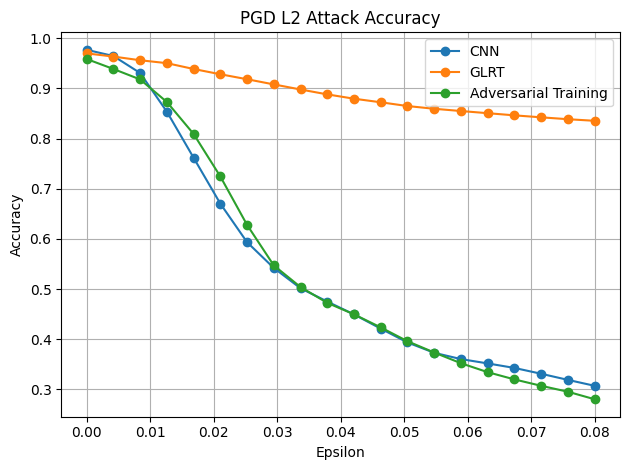

In [28]:
pgd_l2.plot(
    x="epsilon",
    y=["cnn_accuracy", "glrt_accuracy", "adv_trained"],
    marker='o'
)

plt.title("PGD L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(["CNN", "GLRT", "Adversarial Training"])
plt.tight_layout()
plt.show()

In [29]:
pgd_l2.to_csv('../results/baseline/doa/pgd_l2_accuracy_with_adv.csv', index=False)